# Notebook 04: Reporte Final - Política de Inventario 2024
## Objetivo: Combinar el pronóstico base (GBR) con el cálculo de riesgo (GPD por producto) para generar la política de inventario final.

## Metodología:

- Cargar el pronóstico base de 2024 (data/processed/predicciones_demanda_2024.csv).

- Cargar el mapeo de stock de seguridad por producto (data/processed/stock_seguridad_por_producto.csv).

- Unir (merge) las dos tablas.

- Calcular la columna final: stock_total_recomendado = prediccion_ventas + stock_de_seguridad.

- Guardar el reporte final.

## 0. Configuración e Importación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 7)

## 1. Cargar Artefactos del Modelo
### Cargar el pronóstico base

In [2]:
path_pronostico = '../data/processed/predicciones_demanda_2024.csv'
df_pronostico = pd.read_csv(path_pronostico)
df_pronostico['fecha'] = pd.to_datetime(df_pronostico['fecha']) # Importante

print(f"Pronóstico base cargado: {len(df_pronostico)} filas.")

Pronóstico base cargado: 12000 filas.


### Cargar el historial COMPLETO para el gráfico de trazabilidad

In [3]:
path_historial = '../data/raw/demanding_forecast.csv'
df_historial = pd.read_csv(path_historial)
df_historial['fecha'] = pd.to_datetime(df_historial['fecha'])

print(f"Historial completo cargado: {len(df_historial)} filas.")

Historial completo cargado: 80748 filas.


## --- 2. Preparar Reporte Final ---

In [4]:
# El pronóstico es la recomendación final
df_final = df_pronostico.copy()
df_final['stock_total_recomendado'] = np.round(df_final['prediccion_ventas'])

# Reordenar columnas
df_final = df_final[['fecha', 'prod_id', 'prediccion_ventas', 'stock_total_recomendado']]

print("Reporte final (basado solo en GBR) generado:")
print(df_final.head())

Reporte final (basado solo en GBR) generado:
       fecha  prod_id  prediccion_ventas  stock_total_recomendado
0 2024-01-01        0        2059.984012                   2060.0
1 2024-02-01        0        1472.463920                   1472.0
2 2024-03-01        0        1106.306216                   1106.0
3 2024-04-01        0         880.477605                    880.0
4 2024-05-01        0         827.766047                    828.0


## --- 3. Guardar Reporte Final ---

In [5]:
path_salida_final = '../data/processed/politica_inventario_final_2024.csv'
df_final.to_csv(path_salida_final, index=False)
print(f"Reporte final guardado en: {path_salida_final}")

Reporte final guardado en: ../data/processed/politica_inventario_final_2024.csv


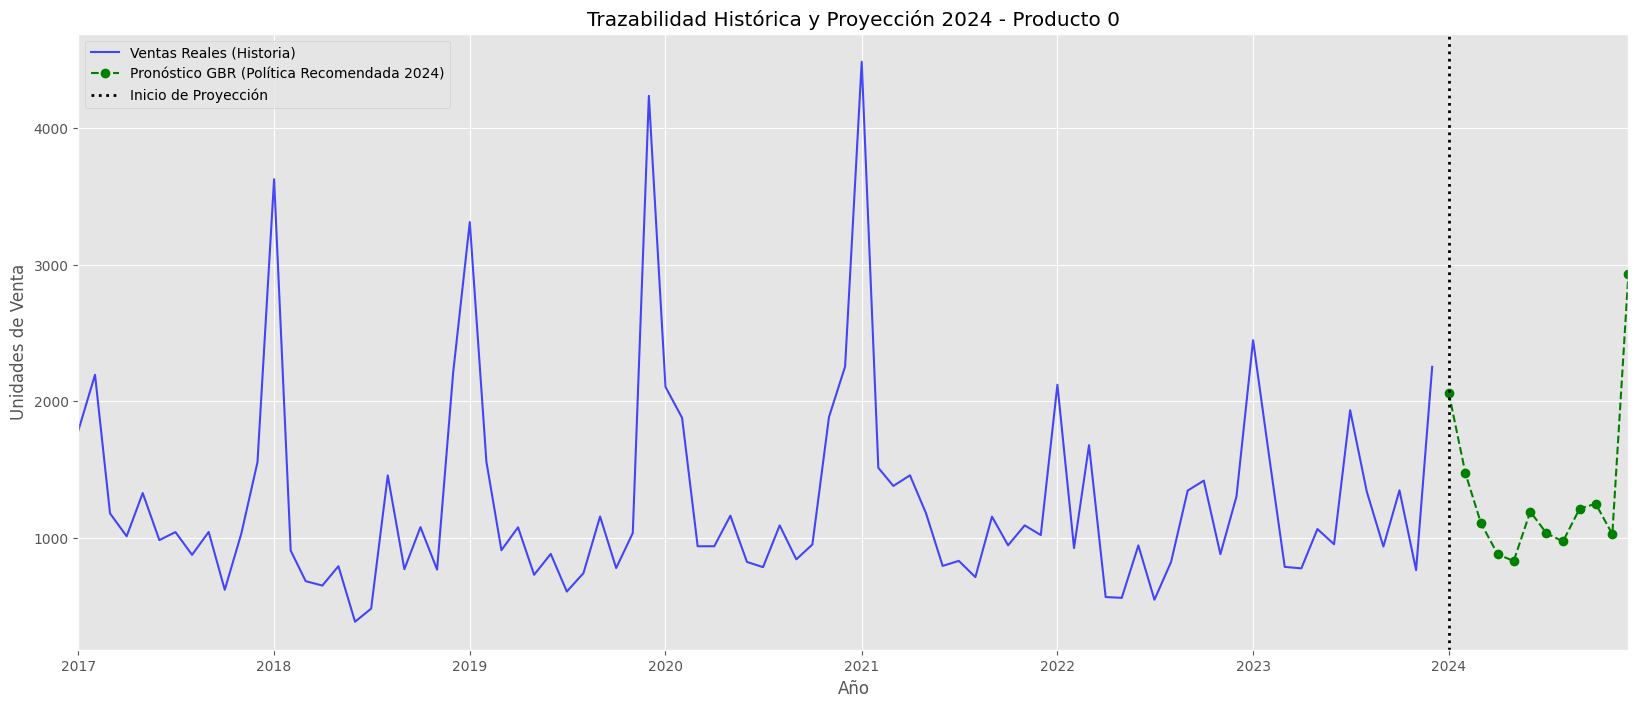

In [6]:
# --- 4. Visualización de Trazabilidad (Simplificada) ---
PRODUCT_ID_TO_PLOT = 0 # Elige un producto

# Historial
df_plot_hist = df_historial[df_historial['prod_id'] == PRODUCT_ID_TO_PLOT]
# Pronóstico (ya está en df_final)
df_plot_fcst = df_final[df_final['prod_id'] == PRODUCT_ID_TO_PLOT]

plt.figure(figsize=(20, 8))
# 1. Historial de ventas reales
plt.plot(
    df_plot_hist['fecha'], 
    df_plot_hist['ventas'], 
    label='Ventas Reales (Historia)', 
    color='blue', 
    alpha=0.7
)

# 2. Pronóstico GBR (la nueva política)
plt.plot(
    df_plot_fcst['fecha'], 
    df_plot_fcst['stock_total_recomendado'], 
    label='Pronóstico GBR (Política Recomendada 2024)', 
    color='green', 
    linestyle='--',
    marker='o'
)

# 3. Línea vertical de separación
plt.axvline(
    pd.to_datetime('2024-01-01'), 
    color='black', 
    linestyle=':', 
    linewidth=2, 
    label='Inicio de Proyección'
)

plt.title(f'Trazabilidad Histórica y Proyección 2024 - Producto {PRODUCT_ID_TO_PLOT}')
plt.ylabel('Unidades de Venta')
plt.xlabel('Año')
plt.xlim(pd.to_datetime('2017-01-01'), pd.to_datetime('2024-12-01'))
plt.legend()
plt.grid(True)

# Guardar la figura final
plt.savefig('../reports/figures/trazabilidad_final_gbr.png', bbox_inches='tight')
plt.show()